## De novo assembly with Flye

Flye is a de novo assembler for long and noisy reads, such as those produced by PacBio and Oxford Nanopore Technologies (ONT), developed by [Kolmogorov et al. (2018)](#flye). Flye implements an algorithm that builds the A-Bruijn (assembly) graph from long error-prone reads and features many new improvements.  It also has a polished module that produces the final assembly. In difference from another existing assemblers, Flye does not attempt to construct accurate contigs (at least at the initial assembly stage) but instead generates arbitrary paths in the unknown assembly graph and, further, an assembly graph is built from these paths. Although Flye constructs overlapping contigs with possible assembly errors at the initial stage, they are combined into an accurate assembly graph and the repetitons in the assembly graph are resolved by using small variations between several repeat instances that were left unresolved during the initial assembly stage. Finally, the algorithm constructs a new and less tangled assembly graph, in which the accurate contigs as represented as paths.

Flye have been tested against several assemblers to demonstrate that it generates better or comparable assemblies and performs 2-10 times faster than hierarchical assembly pipelines.



### Installing Flye in local computers

Flye is a Python 2.7 tool that runs from the command line on Linux and Mac OS X platforms. The users can get the latest stable release by using [Bioconda](#bioconda), the bioinformatics channel for the conda package manager:
```
$ conda install flye
```

or, alternatively, download and compile the latest git version:
```
$ git clone https://github.com/fenderglass/Flye
$ cd Flye
$ python setup.py build
$ python setup.py install  # optional (for better OS integration)
```

The Flye package includes some third-party software:

* <a href="https://github.com/efficient/libcuckoo">libcuckoo</a> (a library of high-performance, compact hash table that allows multiple concurrent reader and writer threads) <br/>
* <a href="https://github.com/ekg/intervaltree">intervaltree</a> (basic implementation of an interval tree using C++ templates, allowing the insertion of arbitrary types into the tree)<br/>
* <a href="http://lemon.cs.elte.hu/trac/lemon">lemon</a> (efficient implementations of common data structures and algorithms with focus on combinatorial optimization tasks connected mainly with graphs and networks)<br/>
* <a href="https://github.com/lh3/minimap2">minimap2</a> (sequence alignment program that aligns DNA or mRNA sequences against a large reference database)<br/>


### Changes implemented in recent releases
We can remark some improvements that have been incorporated in the recent releases of the tool:

* Multiple read files and gzipped Fasta/q support (since release 2.3) <br/>
* Better contiguity for larger genome assemblies (since release 2.3.2) <br/>
* Polishing of large genomes is 2-3x faster and requires less memory (since release 2.3.4) <br/>
* Assembly of large (human size) genomes is now faster (since release 2.3.5) <br/>
* Memory consumption for large genome assemblies reduced by ~30\% (since release 2.3.6) <br/>


### Executing Flye

The basic arguments of Flye are:

| <p style='text-align: left;'> parameter </p>                     | <p style='text-align: left;'>description</p> | 
|:-----------------------------------------------------------|:----------|
| <p style='text-align: left;'>--nanoraw</p>         | <p style='text-align: left;'>FASTA/FASTQ reads file of ONT reads.</p>        | 
| <p style='text-align: left;'>--out-dir</p> | <p style='text-align: left;'>Output directory.</p>        | 
| <p style='text-align: left;'>--genome-size</p>   | <p style='text-align: left;'>Size of the assembled genome.</p>        |
| <p style='text-align: left;'>--threads</p>   | <p style='text-align: left;'>Number of available threads to perform the assembly.</p>        | 
| <p style='text-align: left;'>--subassemblies</p>   | <p style='text-align: left;'>Multiple high-quality contigs input.</p>        | 
| <p style='text-align: left;'>--asm-coverage</p>   | <p style='text-align: left;'>Reduced coverage for initial contig assembly.</p>        |


The input reads can be in FASTA or FASTQ format, uncompressed or compressed with gz. Currenlty, Flye supports both raw and corrected reads from PacBio and ONT. The expected error rates are <30% for raw and <2% for corrected reads. 

The option *--subassemblies* allows to perform a consensus assembly of multiple sets of high-quality contigs by specifying multiple files separated by spaces. 

An estimate of the genome size must be provided as input (e.g. 5m or 2.6g). The estimate could be rough (e.g. withing 0.5x-2x range) and does not affect the other assembly stages. 

The assemblies of large genomes at high coverage typically require a lot of RAM. In order to reduce memory consumption, the *--asm-coverage* option can be used to specify a subset of the longest reads for initial contig assembly (the developer recommends 40x coverage to produce enough good draft contigs). Regardless of this parameter, all reads will be later used for repeat graph analysis.


In [1]:
!flye --nano-raw data/sample/reads.fastq --out-dir data/sample/flye_output --genome-size 2.1m --threads 2

[2018-11-13 14:07:47] INFO: Running Flye 2.3.1-release
[2018-11-13 14:07:47] INFO: Assembling reads
[2018-11-13 14:07:47] INFO: Reading sequences
[2018-11-13 14:07:47] INFO: Generating solid k-mer index
[2018-11-13 14:08:05] INFO: Counting kmers (1/2):
0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
[2018-11-13 14:08:11] INFO: Counting kmers (2/2):
0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
[2018-11-13 14:08:21] INFO: Filling index table
0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
[2018-11-13 14:08:32] INFO: Extending reads
0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
[2018-11-13 14:12:19] INFO: Assembled 23 draft contigs
[2018-11-13 14:12:19] INFO: Generating contig sequences
0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
[2018-11-13 14:13:35] INFO: Running Minimap2
[2018-11-13 14:13:56] INFO: Computing consensus
[2018-11-13 14:14:07] INFO: Performing repeat analysis
[2018-11-13 14:14:07] INFO: Reading sequences
[2018-11-13 14:14:07] INFO: Building repeat graph
0% 10% 20% 30% 40% 50% 60

In [ ]:
!dot -Tpng -O data/sample/flye_output/assembly_graph.dot

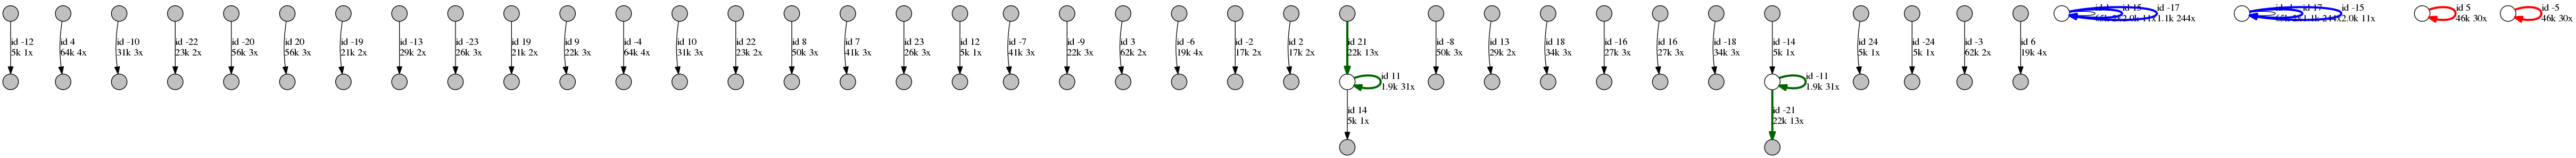

In [2]:
#Show output of Graphviz conversion to PNG (dot command)
from IPython.display import Image
Image("data/sample/flye_output/assembly_graph.dot.png") # double-click on the image to zoom\n

### Further remarks

In the GitHub repository of [Flye](#flye3) can be found several ready-to-use PacBio and ONT datasets to try Flye assembly. According to the results obtained by the developers of Flye, the assembly of a bacteria or small eukaryote coverage typically takes less than half an hour on a modern desktop. The following table shows additional detailed benchmarks 

|Genome        | Size   | Coverage | CPU time  | RAM    |
|--------------|--------|----------|-----------|--------|
| E.coli       | 5 Mb   | 50       | 170 m     | 2 Gb   |
| S.cerevisiae | 12 Mb  | 30       | 180 m     | 7 Gb   |
| C.elegans    | 100 Mb | 30       | 160 h     | 23 Gb  |
| H.sapiens    | 3 Gb   | 30       | 5000 h    | 500 Gb |


### References

<a id='flye1'>[1]</a> Mikhail Kolmogorov, Jeffrey Yuan, Yu Lin and Pavel Pevzner (2018). "Assembly of Long Error-Prone Reads Using Repeat Graphs", bioRxiv, URL https://www.biorxiv.org/content/early/2018/01/12/247148

<a id='flye2'>[2]</a> Mikhail Kolmogorov, Jeffrey Yuan, Yu Lin, & Pavel Pevzner (2018). Supplementary files for the manuscript "Assembly of Long Error-Prone Reads Using Repeat Graphs" (Version 2.0) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.1422834

[3] Yu Lin, Jeffrey Yuan, Mikhail Kolmogorov, Max W Shen, Mark Chaisson and Pavel Pevzner (2016). "Assembly of Long Error-Prone Reads Using de Bruijn Graphs", PNAS URL www.pnas.org/content/113/52/E8396

<a id='bioconda'>[4]</a> Bioconda,  channel for the conda package manager specializing in bioinformatics software. URL
https://bioconda.github.io/ 

<a id='flye3'>[5]</a> Mikhail Kolmogorov (2018). Flye assembler. GitHub. URL
https://github.com/fenderglass/Flye